In [24]:
# import pandas lib as pd
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns  


In [25]:
df = pd.read_csv('dataset.csv')

#print(df.head())

In [26]:
# Display first few rows
#print(df.head())

# Check dataset structure
#print(df.info())



In [27]:
# Check for missing values
#print(df.isnull().sum())


In [28]:

# Summary statistics of numerical columns
#print(df.describe())

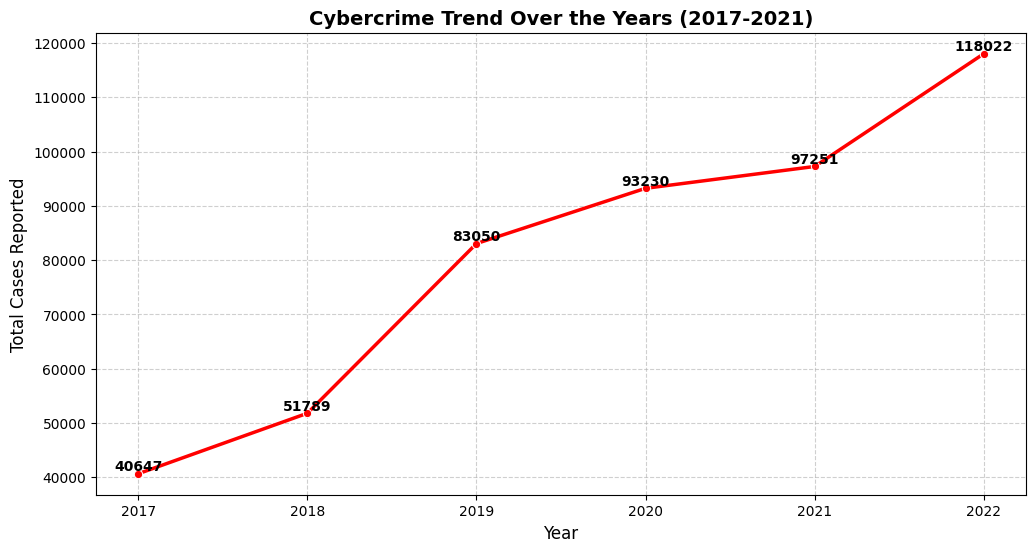

In [29]:
# Group by year and sum total cases reported
yearly_trend = df.groupby("YEAR")["Cases Reported during the year (Col.5)"].sum()

# Plot the trend
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker="o", color="red", linewidth=2.5)

# Adding labels and title for better clarity
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Cases Reported", fontsize=12)
plt.title("Cybercrime Trend Over the Years (2017-2021)", fontsize=14, fontweight="bold")

# Adding grid for better visualization
plt.grid(True, linestyle="--", alpha=0.6)

# Annotate each point for better understanding
for year, cases in yearly_trend.items():
    plt.text(year, cases, f"{cases}", ha="center", va="bottom", fontsize=10, fontweight="bold")

plt.show()


C:\Users\sampu\AppData\Local\Temp\ipykernel_2560\3297063477.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_distribution.values[:10], y=crime_distribution.index[:10], palette="coolwarm")


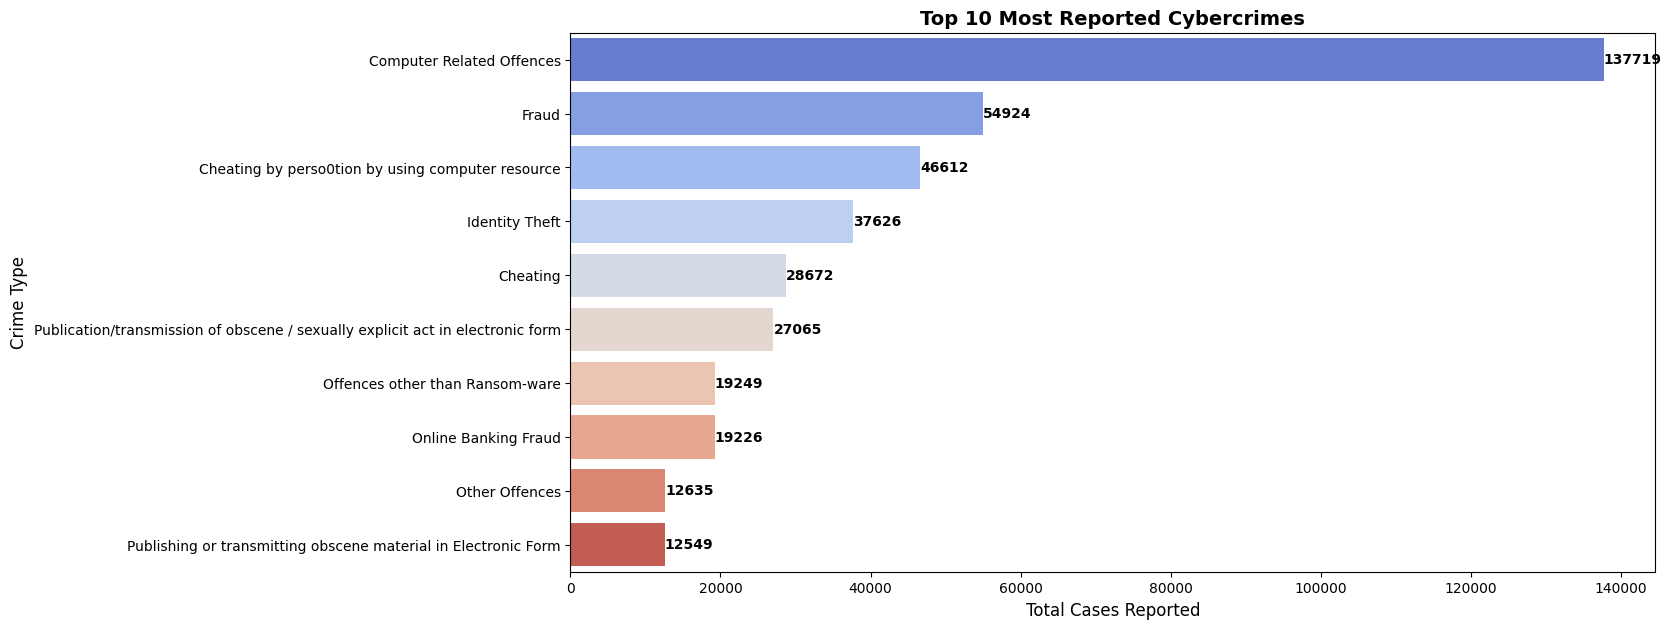

In [30]:
# Count total cases per crime type and sort in descending order
crime_distribution = df.groupby("Crime Head (Col.3)")["Cases Reported during the year (Col.5)"].sum().sort_values(ascending=False)

# Plot the top 10 cybercrime types
plt.figure(figsize=(14, 7))
sns.barplot(x=crime_distribution.values[:10], y=crime_distribution.index[:10], palette="coolwarm")

# Adding labels and title
plt.xlabel("Total Cases Reported", fontsize=12)
plt.ylabel("Crime Type", fontsize=12)
plt.title("Top 10 Most Reported Cybercrimes", fontsize=14, fontweight="bold")

# Adding annotations on bars to show exact values
for index, value in enumerate(crime_distribution.values[:10]):
    plt.text(value, index, f"{value}", ha="left", va="center", fontsize=10, fontweight="bold")

plt.show()


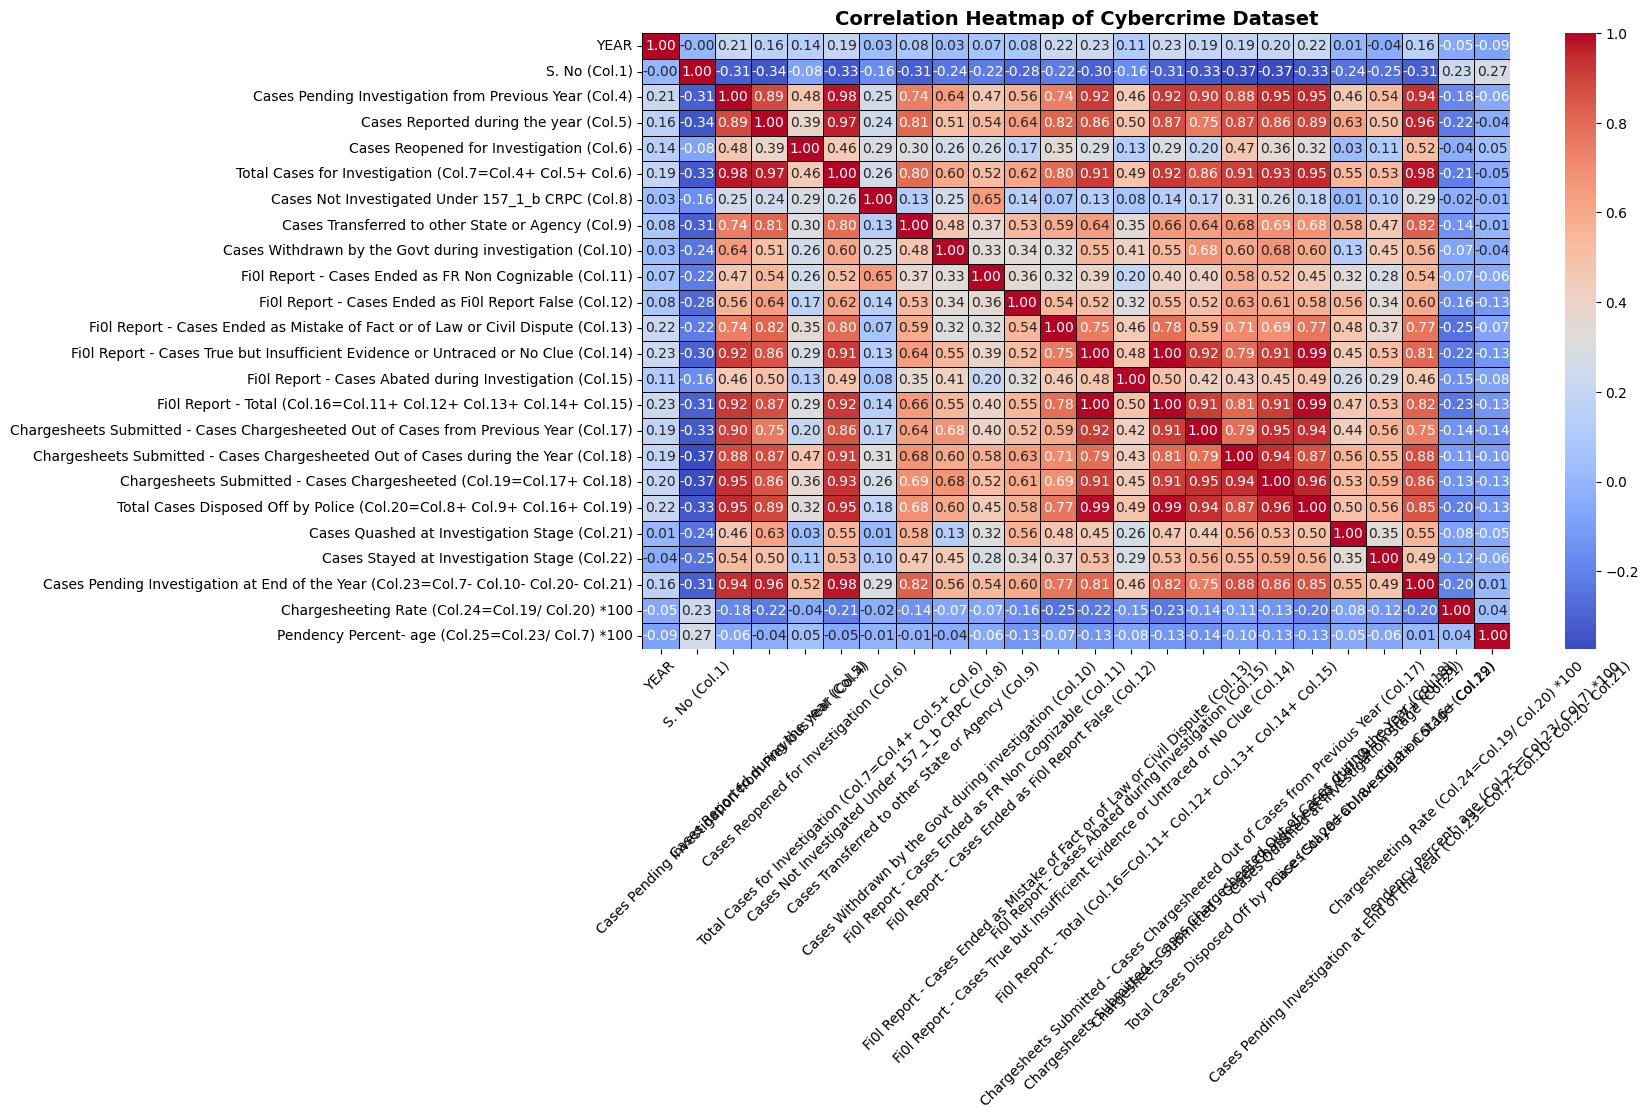

In [31]:
# Ensure only numerical columns are selected
numeric_df = df.select_dtypes(include=["number"])

# Check if enough numeric columns are available
if numeric_df.shape[1] > 1:
    plt.figure(figsize=(14, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor="black")

    # Adding title and improving aesthetics
    plt.title("Correlation Heatmap of Cybercrime Dataset", fontsize=14, fontweight="bold")
    
    # Rotating X-axis labels for better visibility
    plt.xticks(rotation=45)

    plt.show()
else:
    print("Not enough numeric columns for correlation analysis.")


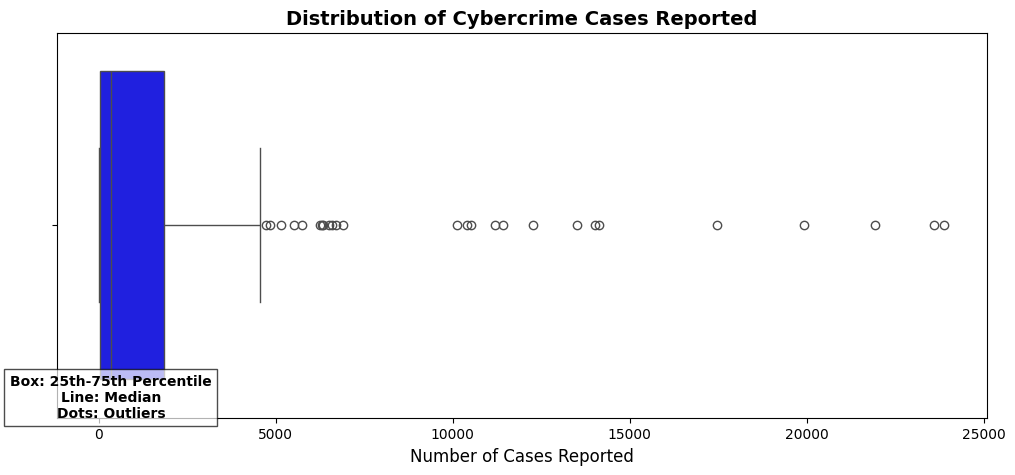

In [32]:

# Set figure size
plt.figure(figsize=(12, 5))

# Create a boxplot for the distribution of reported cybercrime cases
sns.boxplot(x=df["Cases Reported during the year (Col.5)"], color="blue")

# Add labels and title for better understanding
plt.xlabel("Number of Cases Reported", fontsize=12)
plt.title("Distribution of Cybercrime Cases Reported", fontsize=14, fontweight="bold")

# Add descriptive text explaining the box plot components
plt.text(
    x=df["Cases Reported during the year (Col.5)"].median(),  # X-coordinate at median value
    y=0.5,  # Adjust the y-position (doesn't affect boxplot)
    s="Box: 25th-75th Percentile\nLine: Median\nDots: Outliers",  # Explicit 's' parameter (string)
    fontsize=10,
    color="black",
    fontweight="bold",
    ha="center",
    bbox=dict(facecolor="white", alpha=0.7, edgecolor="black")  # Background box for readability
)

# Show the plot
plt.show()
